# Introduction to Data Science
## Homework 5

Student Name: Benjamin Jakubowski

Student Netid: buj201
***

### Part 1: Critique this plan
1\. After a few beers your CIO invited his buddy from Blue Moon consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Blue Moon, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Blue Moon says about the characteristics of your service is accurate.

Based on what we have covered in class and in the book, identify the four most serious weaknesses/flaws in this abridged version of Blue Moon's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--- -------------------------------------------------------------------------- ---
                            Targeted Audience Expansion             
                      Prepared by Blue Moon Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Blue Moon) have a 
large database of consumers who can be targeted.  We will build a predictive model 
to estimate which of these consumers are the most likely to adopt the product, and
then target them with the special offer you have designed.

More specifically, we will build a logistic regression (LR) model to predict adop-
tion of the service by a consumer, based on the data on your current customers of 
this service.  The model will be based on their demographics and their usage of 
the service. We believe that logistic regression is the best choice of method be-
cause it is a tried-and-true statistical modeling technique, and we can easily 
interpret the coefficients of the model to infer whether the attributes are stat-
istically significant, and whether they make sense. If they are statistically sig-
nificant and they do make sense, then we can have confidence that the model will 
be accurate in predicting service uptake. We will apply the model to our large 
database of consumers, and select out those who have not yet subscribed and whom
the LR model predicts to be the most likely to subscribe.  To these we will send 
the targeted offer. As this is a fixed-profit-per-customer service, this also 
will in effect rank them by expected profit.
--- -------------------------------------------------------------------------- ---
```

1. Problem 1: The first problem is that we intend to build a LR Model based on "the data on [the] current customers of 
this service." Unfortunately this data won't support our modeling goal. To build the logistic model, we need data on both (i) customers who were offered the product/service and adopted it, and (ii) customers who were offered the product/service and did not adopt it. If we only have data from current customers, we only have (i), not (ii) and as such won't be able to estimate probablilities through LR- in essense, all of our data are labeled "1", and we have no "0"s.
<br><br>
2. Problem 2: The second problem is the statement "if they are statistically significant and they do make sense, then we can have confidence that the model will be accurate in predicting service uptake." This is definitely not true- given large sample sizes, we will likely have sufficient power to achieve statistical significance even for very small effect sizes. However, in this situation our accuracy will likely be poor (since, with small effect sizes, the two conditional distributions $f(\mathbf{X} | Y = 0), f(\mathbf{X} | Y = 1)$ --i.e. the joint distribution of predictors conditioned on our binary target-- will likely be substantially overlapping).
<br><br>
3. Problem 3: The third problem is our targeting strategy- "select out those who have not yet subscribed and whom the LR model predicts to be the most likely to subscribe." This strategy is ill-conceived, because we are not interested in how likely a customer is to subscribe- in fact, if a customer is identify as being very likely to subscribe, we would <b>not</b> want to target them! Instead, we should use lift (estimated probability of response given targeted over estimated probability of response), since we will only increase expected profit if we increase the probability of a customer adopting/purchasing our service.
<br><br>
4. Problem 4: The fourth problem is our feature space- "demographics and their usage of the service." This is very obviously leakage, since we will only have measurements of a customers usage of the service if the customer is already using the service. In this problem (if we did have a dataset that supported our modeling goal, with both 0 and 1 labels for our target), we would want to make sure we restrict the feature space to features available prior to a customer adopting the service.

### Part 2: Naive Bayes

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

<b>Answer: </b><br>
Laplace smoothing is useful when there is one (or more, but for ease of exposition let's just consider a single) feature $e_{bad}$ that appears very infrequently in the sample documents. In this case, there is a non-neglible probability that our estimate

$$P(e_{bad} | C = c) = \frac{\textrm{count}(e_{bad}, c)}{\textrm{count}(c)}= 0 \textrm{ for some } c \in C$$

which in turn produces a class probability estimate of $P(C = c | e_{bad} \in E) = 0$. In essense, we're just memorizing the traning set (using sparse features as near-unique identifiers of documents), and as such are likely to severly overfit. To make this point more concrete, imagine we're trying to classify documents as spam/ham. Assume the feature "monosodium glutamate" (which, one can assume, is a very low-frequency term regardless of document class) appears in one instance of ham in the training set, but does not appear in any of the spam. Then failing to use use Laplace smoothing would result in a prediction $P(C = \textrm{ spam } | \textrm{ "monosodium glutamate"} \in E) = 0$ (though it is likely this rule would not generalize well, and instead reflects our model memorizing the training data).

### Part 3: Text classification for sentiment analysis
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1\. Load the data into a pandas `DataFrame()`.

In [1]:
import pandas as pd
data = pd.read_csv('data/imdb.csv')
data.head(6)

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N
5,'There is no greater disservice to do to histo...,P


2\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [2]:
data.Class = data.Class.map(lambda x: 1 if x == 'P' else 0)

3\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training.

In [3]:
from sklearn.cross_validation import train_test_split

X = data.Text
Y = data.Class

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state=11242015)

4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

binary_vectorizer = CountVectorizer(input='content', analyzer='word', ngram_range=(1, 2), stop_words='english')
X_train_binary = binary_vectorizer.fit_transform(X_train)
X_test_binary = binary_vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer(input='content', analyzer='word', ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

4\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

In [10]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

def train_test_models():
    models = {'log_reg':LogisticRegression, 'NB':BernoulliNB}
    feature_sets = {'binary':[X_train_binary,X_test_binary], 'tfidf':[X_train_tfidf,X_test_tfidf]}
    results = {}
    for model in models:
        for features in feature_sets:
            model_instance = models[model]()
            model_instance.fit(feature_sets[features][0],Y_train)
            predictions = model_instance.predict_proba(feature_sets[features][1])
            fpr, tpr, thresh = metrics.roc_curve(Y_test, predictions[:,1])
            name = str(model) + '_' + str(features)
            results[name] = [fpr, tpr]
    return results

results = train_test_models()

In [20]:
import matplotlib.pyplot as plt

def plot_roc_curves(results):
    plots = plt.figure()
    for model in results:
        auc = metrics.auc(results[model][0],results[model][1])
        keys = {'log_reg_tfidf':"Logistic regression, TFIDF", 'NB_tfidf':"Naive Bayes, TFIDF", 'log_reg_binary':"Logistic regression, Binary", 'NB_binary':"Naive Bayes, Binary"}
        key = keys[model] + '\nAUC = ' + str(auc)
        plt.plot(results[model][0],results[model][1],label=key)
    plt.legend(title='Model class, feature set', loc=7)
    plt.xlabel('False postive rate (FPR)')
    plt.ylabel('True postive rate (TPR)')
    plt.title('ROC curves for each \nmodel/feature set combination')
    return

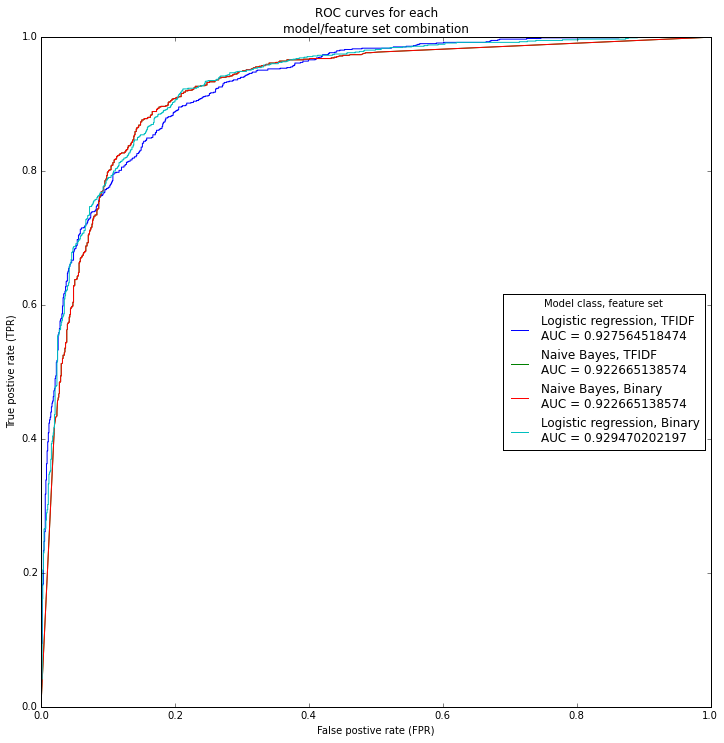

In [21]:
plot_roc_curves(results)

Based on our results, it appears the best predictor is logistic regression with a binary feature set. This model does a better job in the sense that it has the maximum AUC of all our models. However, it is worth noting that in one region, Naive Bayes outperforms Logistic Regression (i.e. the ROC curve is higher for FPR's between approximately [0.1,0.2]). Thus depending on the relative cost of false positives/false negatives, we may want to considering using this model. It is also worth noting that all the observed AUC's are extremely high. This reflects the fact that we excluded the middle when building our model (i.e. we built a classifier on only extreme ratings from 1-4 and from 7-10). Since AUC describes the separation of the (high dimensional) predictor distribution conditioned on the target, it make sense we achieved a high AUC having excluded these intermediate ratings.

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples the should have been positive, but were incorrectly classified as negative. List the text below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [38]:
model = LogisticRegression()
model.fit(X_train_binary,Y_train)
predictions = model.predict(X_test_binary)

In [89]:
is_false_negative = pd.concat([(pd.Series(predictions, name='predictions', index=Y_test.index) == 0), (Y_test==1)], axis=1).all(axis=1) 
all_false_negatives = is_false_negative[is_false_negative==True]

#Note I first skimmed through all the false negatives to identify the false negatives for exposition:
j = 1
print '-------------------------------------------------------------------------------------------------------------'
#for i in all_false_negatives.index:
for i in [6042, 2898, 1020, 4169, 67]:
    print "False positive example", j
    print X_test[i]
    print '-------------------------------------------------------------------------------------------------------------\n'
    j += 1

-------------------------------------------------------------------------------------------------------------
False positive example 1
'B Movie? Yes. DIY? Yes. First Movie? Yes. But Aestheically A+. This movie definitely had some bad sound/editing/lighting/acting/etc. etc. problems. However this movie has many positive things about it. First off the most annoying character dies first! Second its made to be a parody/funny B Rated Horror movie. The comments our killer makes to his victims left me and my friends rolling around on the floor laughing. The problem is a lot of people try to take every independent movie and expect it to be a masterpiece. Take it for what it is a bunch of kids right out of high school made their first movie. For what it is just that it is really good.'
-------------------------------------------------------------------------------------------------------------

False positive example 2
'THE BRAIN THAT WOULDNT DIE was considered so distasteful in 1959 that sever

In essense, the selected false negatives are misclassified because the text of the review is negative! In general, these false negative reviews are not only reviews of the film- they are reviews of the film <b>in relation to</b> another (internal or external) "object". The relevant relation varies between examples:

* In examples 1 and 2, the reviewer reviews the film in relation to the larger genre of parody.
* In example 3, the reviewer reviews the film in relation to a better original
* In example 4, the reviewer reviews the film in relation to a better adaptation of the novel
* In example 5, the reviewer reviews the film in relation to the characterization of Martha.

Thus, while the reviewer apparently thought the film was good (i.e. he/she gave the film a score of 7 or greater), he or she thought it was either substantially better or worse in relation some other object referenced in the text review. Because this type of review includes many negative words/bigrams (of the sort "the film was worst than [another object]" or "[another object] was worse than the film"), they end up being classified as "negative". 